#### Financial Fraud Analysis using Supervised Learning, SMOTE(Skewed/Imbalanced Dataset) and Autoencoders for Self-Learning Capabilities.

## Import Required Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp

from pathlib import Path
from itertools import product
import string

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.cluster import MiniBatchKMeans, DBSCAN

In [2]:
df = pd.read_csv(r'C:\Users\DR SAGWE\Documents\creditsampledata.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


### Exploratory Data Analysis (EDA)

In [3]:
#looking the type and searching for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   Time        8000 non-null   int64  
 2   V1          8000 non-null   float64
 3   V2          8000 non-null   float64
 4   V3          8000 non-null   float64
 5   V4          8000 non-null   float64
 6   V5          8000 non-null   float64
 7   V6          8000 non-null   float64
 8   V7          8000 non-null   float64
 9   V8          8000 non-null   float64
 10  V9          8000 non-null   float64
 11  V10         8000 non-null   float64
 12  V11         8000 non-null   float64
 13  V12         8000 non-null   float64
 14  V13         8000 non-null   float64
 15  V14         8000 non-null   float64
 16  V15         8000 non-null   float64
 17  V16         8000 non-null   float64
 18  V17         8000 non-null   float64
 19  V18         8000 non-null  

In [4]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3999.50000,95357.290375,0.016628,-0.005726,-0.010398,-0.028731,-0.022065,0.000739,0.016121,-0.004941,...,-0.003501,0.028278,0.006422,-0.000855,-0.000284,0.000740,-0.006161,0.005893,89.669246,0.002125
std,2309.54541,46956.240862,1.899212,1.545809,1.477050,1.426184,1.401964,1.332905,1.305012,1.174568,...,0.678019,0.714746,0.553929,0.606846,0.513374,0.485101,0.394584,0.348770,260.188804,0.046052
min,0.00000,64.000000,-29.973363,-29.198899,-19.947726,-5.416315,-40.427726,-7.810116,-21.234463,-26.069936,...,-13.950186,-4.910197,-12.667179,-2.814898,-3.223535,-1.511259,-5.809357,-3.693525,0.000000,0.000000
25%,1999.75000,55189.750000,-0.915243,-0.610001,-0.893566,-0.903137,-0.714806,-0.790640,-0.560447,-0.215935,...,-0.221765,-0.519427,-0.159989,-0.345288,-0.311490,-0.327823,-0.071358,-0.052957,5.990000,0.000000
50%,3999.50000,85758.000000,0.025737,0.040064,0.165369,-0.035525,-0.076317,-0.282476,0.043119,0.019278,...,-0.026597,0.031274,-0.008716,0.038126,0.023790,-0.061720,0.000514,0.011239,22.855000,0.000000
75%,5999.25000,139042.750000,1.321858,0.784179,0.991859,0.752604,0.601602,0.403259,0.581711,0.331131,...,0.191495,0.549468,0.144751,0.440633,0.344371,0.246298,0.086333,0.076835,78.432500,0.000000
max,7999.00000,172766.000000,2.373022,11.447082,3.985446,9.074932,13.815072,23.917837,44.054461,9.561121,...,14.507345,4.222704,19.228169,3.577753,2.520869,2.693658,5.352193,15.649134,10199.440000,1.000000


0    7983
1      17
Name: Class, dtype: int64

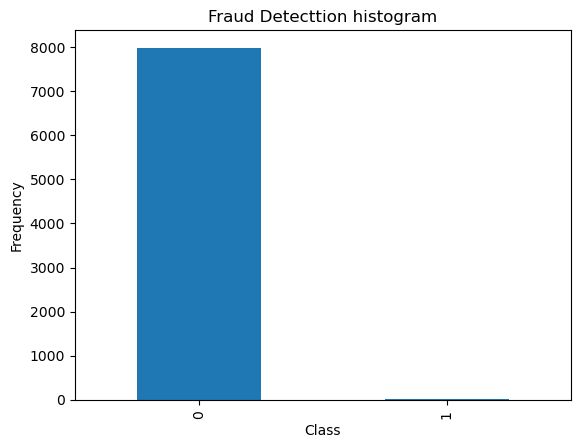

In [5]:
pd.value_counts(df['Class']).plot.bar()
plt.title('Fraud Detecttion histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Class'].value_counts()

In [6]:
#occurrences of fraud and no fraud
occurrences = df['Class'].value_counts()
occurrences

0    7983
1      17
Name: Class, dtype: int64

In [7]:
# ratio of fraud cases
ratio=(17/df.shape[0])*100
ratio

0.21250000000000002

### Data Visualization and Exploration of features in the dataframe

In [8]:
#Convert the DataFrame into two variable x for data columns (V1 - V28) and y for lable column
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
   
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [9]:
X = np.array(df.loc[:, df.columns != 'Class'])
y = np.array(df.loc[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8000, 31)
Shape of y: (8000, 1)


In [10]:
# Function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0.0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1.0", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [11]:
# X and y for the prep_data function 
X, y = prep_data(df)

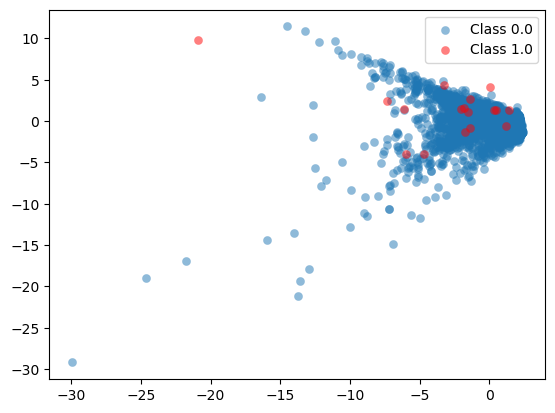

In [12]:
plot_data(X,y)

### Data resampling

#### Undersampling majority class (non-fraud cases)

A method to adjust imbalanced data
Take random draws from non-fraud observations, to match the occurences of fraud observations

### Resampling methods using Python imblean module

In [13]:

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5600, 28)
Number transactions y_train dataset:  (5600,)
Number transactions X_test dataset:  (2400, 28)
Number transactions y_test dataset:  (2400,)


In [14]:
from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()
X_resampled, y_resampled =  method.fit_resample(X, y)

In [15]:
# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get model performance metrics
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2390
           1       0.22      0.50      0.30        10

    accuracy                           0.99      2400
   macro avg       0.61      0.75      0.65      2400
weighted avg       0.99      0.99      0.99      2400



C:\Users\DR SAGWE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Applying Synthetic Minority Oversampling Technique (SMOTE)

In [16]:
# Run the prep_data function
X, y = prep_data(df)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# Define the resampling method
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

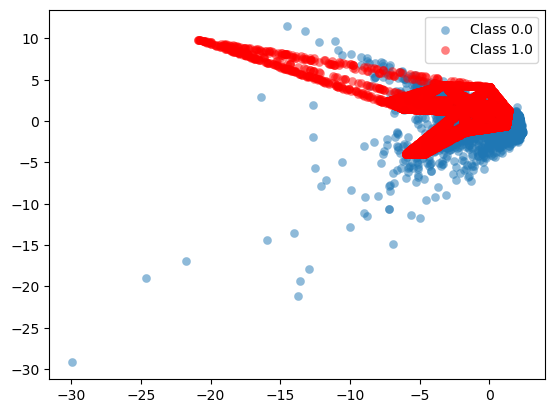

In [19]:
# Plot the resampled data
plot_data(X_resampled,y_resampled)

### Fraud detection algorithms in action

In [20]:
# split the features and labels into train and test data with test_size=0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [21]:
# Define which model to use
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#  Fit the model to the training data
reg = model.fit(X_train, y_train)

#  Obtain model predictions from the test data
y_predicted = model.predict(X_test)

In [22]:
#  Compare y_test to predictions and obtain performance metrics (r^2 score)
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.6609324114868627

### Traditional method of fraud detection

In [23]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95383.605161,0.023553,-0.008543,-0.002408,-0.034757,-0.020108,0.003264,0.023668,-0.004720,-0.010660,...,-0.00692,-0.004279,0.027999,0.006689,-0.000550,-0.000616,0.000659,-0.006740,0.005625,89.721167
1,83000.176471,-3.235382,1.317054,-3.762234,2.801140,-0.941354,-1.184692,-3.527826,-0.108892,-1.546536,...,-0.29245,0.361582,0.159210,-0.119366,-0.144082,0.155552,0.038765,0.265996,0.131853,65.287647


In [25]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,...,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0,0
1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0,0
2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,...,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0,0
3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0,0
4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,...,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0,0


In [26]:
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,7949,34
1,13,4


### Using ML classification to detect fraud

In [27]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

# Obtain model predictions
predicted = clf.predict(X_test)

C:\Users\DR SAGWE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, predicted))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2370
           1       0.95      0.93      0.94      2420

    accuracy                           0.94      4790
   macro avg       0.94      0.94      0.94      4790
weighted avg       0.94      0.94      0.94      4790

Confusion matrix:
 [[2242  128]
 [ 166 2254]]


### Fraud detection using labeled data

##### Split the Dataset into Two Datasets and Summarize

In [29]:
# Seperate data into fraud and non-fraud cases
df_nonfraud = df[df.Class == 0] #non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

#### Flag fraud cases by transaction amount

In [30]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

# Import the module
from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

count     7983.000000
mean        89.721167
std        260.401687
min          0.000000
25%          5.990000
50%         22.950000
75%         78.520000
max      10199.440000
Name: Amount, dtype: float64
_________________________
count     17.000000
mean      65.287647
std      126.525162
min        0.000000
25%        0.830000
50%        1.000000
75%       31.910000
max      354.330000
Name: Amount, dtype: float64
F: 0.14958008266077327
p: 0.6989472590076213


### Transaction Amount Visualization

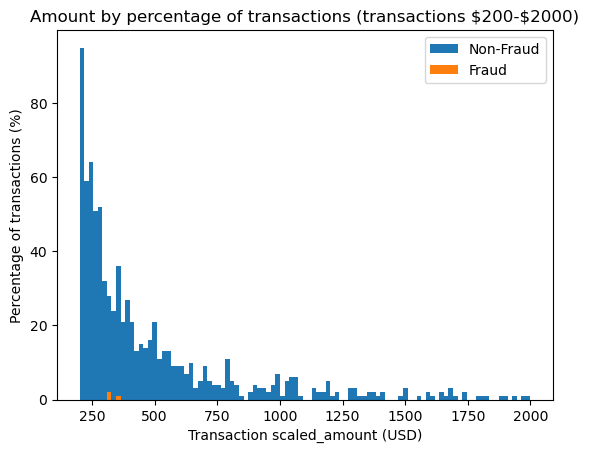

In [31]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction scaled_amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Transaction Amount vs. Time

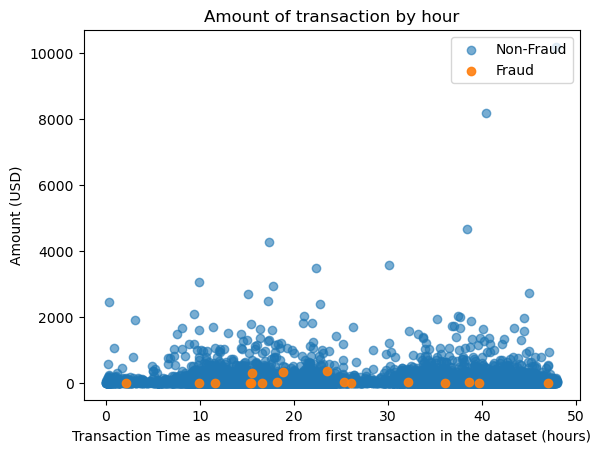

In [32]:
# Plot of transactions in 48 hours
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction Time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

### Feature Scaling
Features V1-V28 have been transformed by PCA and scaled already. Whereas feature "scaled_time" and "scaled_amount" have not.
And considering that we will analyze these two features with other V1-V28, they should better be scaled before we train our
model using various algorithms. Here is why and how.Which scaling method should we use? Standard Scaler is not recommended as
"scaled_time" and "scaled_amount" features are not normally distributed. Min-Max Scaler is also not recommende as there are 
noticeable outliers in feature "scaled_amount". Robust Scaler are robust to outliers: (xi–Q1(x))/( Q3(x)–Q1(x)) (Q1 and Q3 
represent 25% and 75% quartiles). We choose Robust Scaler to scale these two features.

In [33]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,flag_as_fraud
0,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,0,0
1,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,0,0
2,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,0,0
3,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,-0.746625,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0,0
4,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,0.078021,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,0,0


#### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence
heavily in whether a specific transaction is a fraud.

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

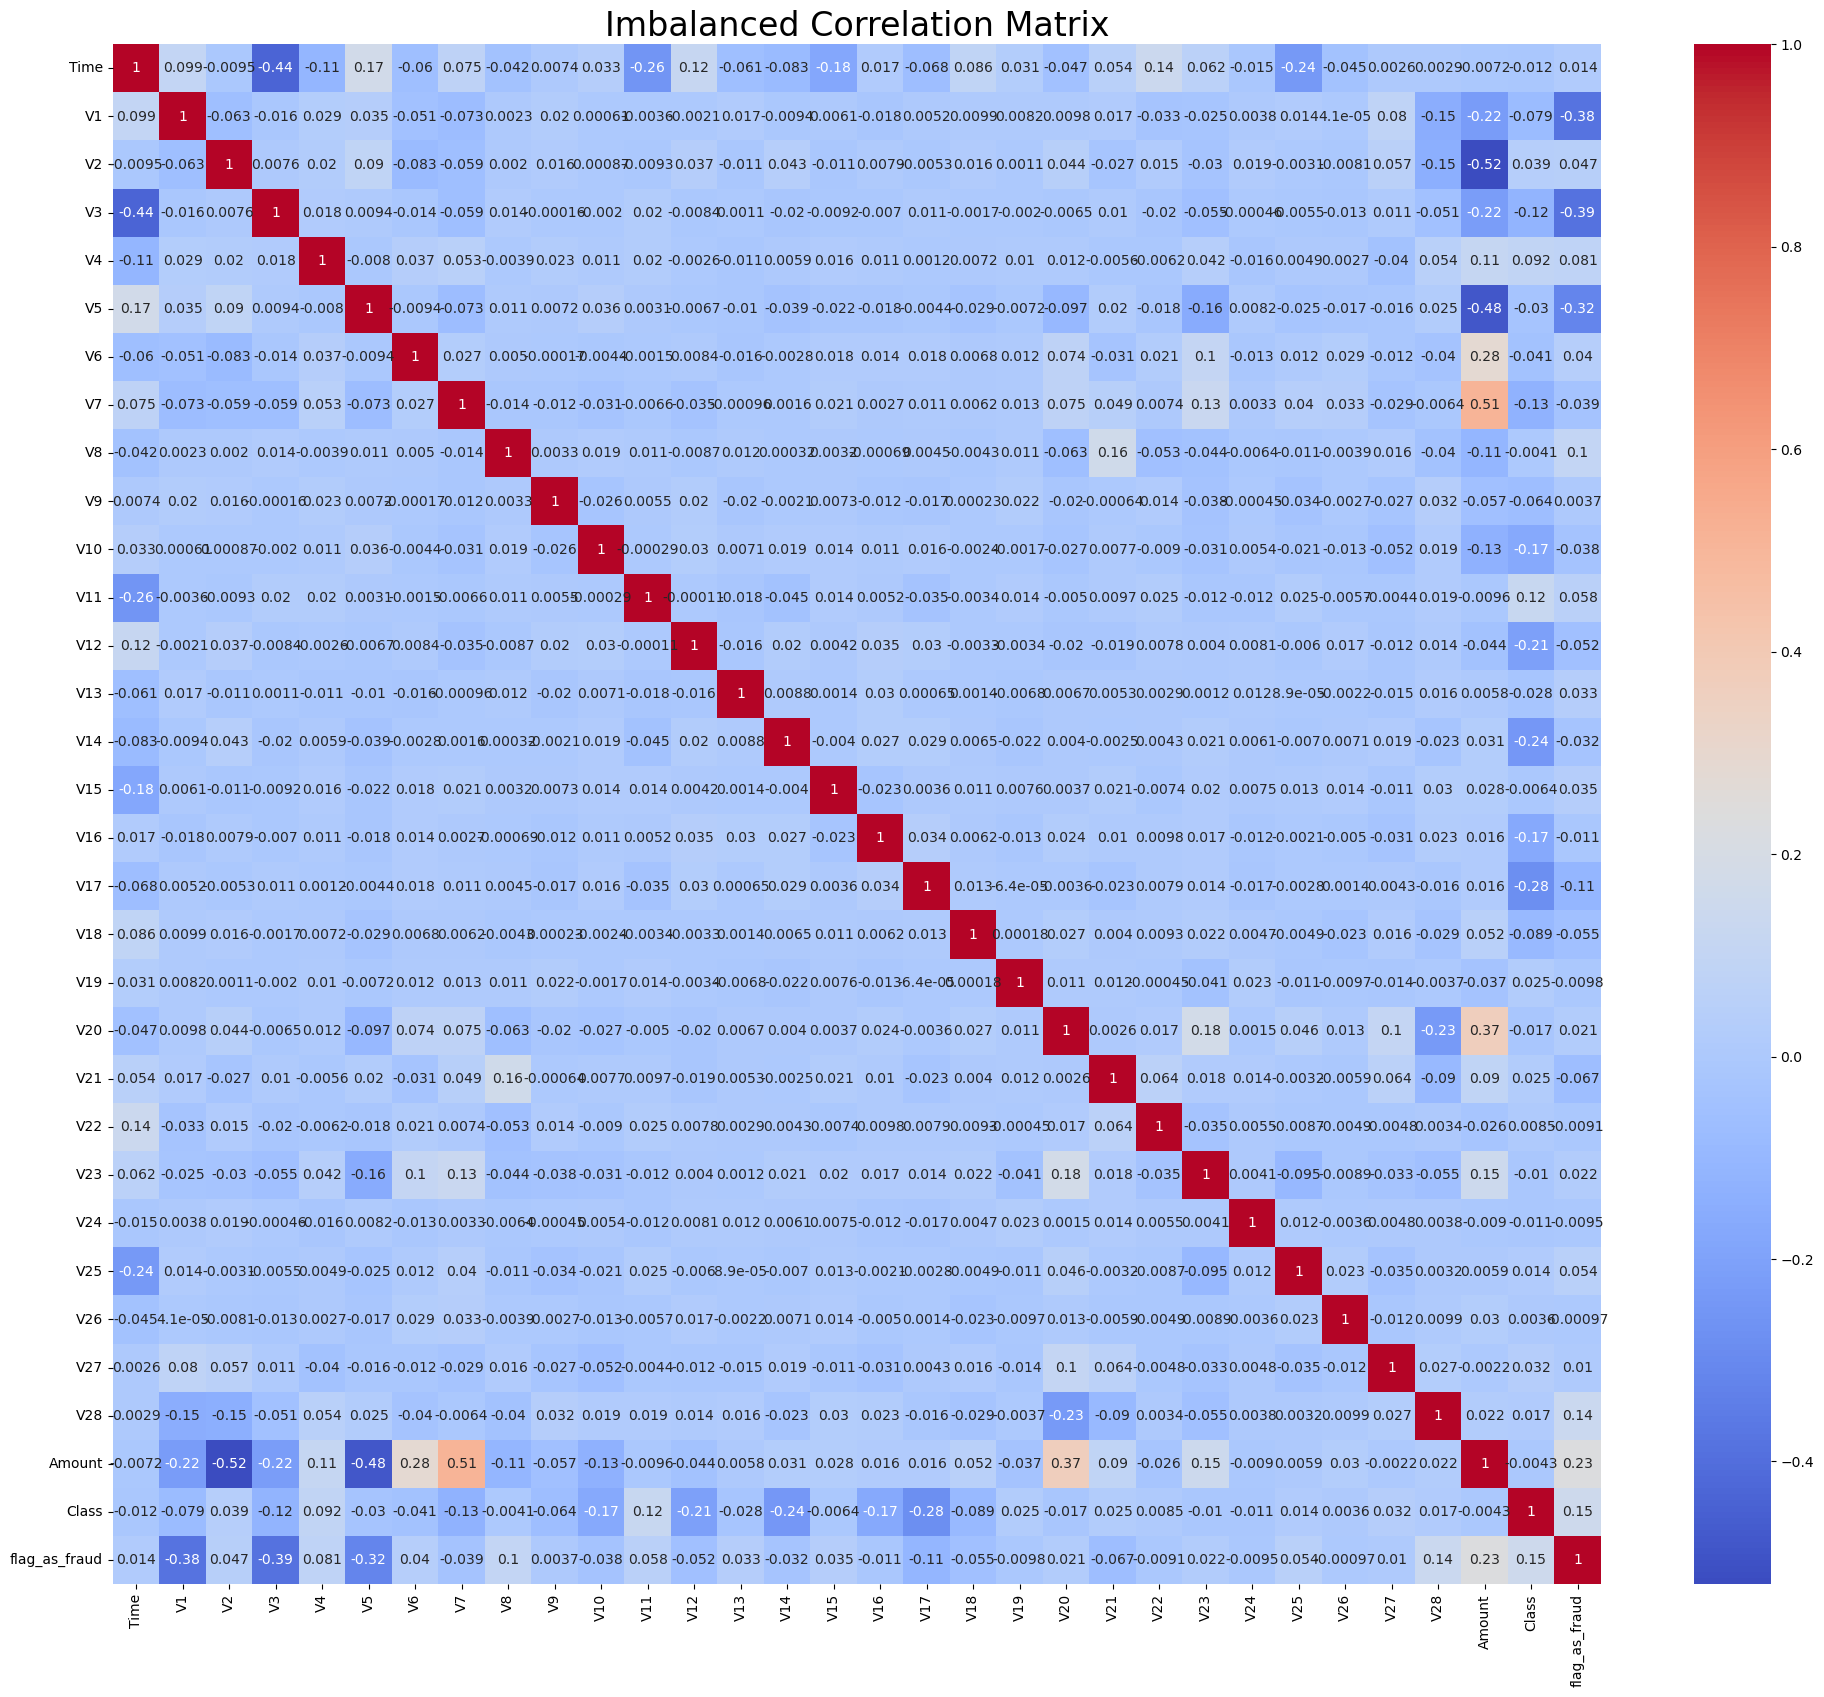

In [34]:
# Plot heatmap of correlation
corr = df.corr()

f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
ax.set_title("Imbalanced Correlation Matrix", fontsize=24)

### Resampling for Imbalanced Data

### Extract features from our scaled dataset

In [35]:
# Define the prep_data function to extract features 
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(df_scaled)

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_14720\3544329068.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(X).astype(np.float)
C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_14720\3544329068.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y).astype(np.float)


### Model Training

In [38]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

C:\Users\DR SAGWE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1996
         1.0       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_14720\2815291932.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1996
         1.0       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [41]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1996
         1.0       1.00      0.50      0.67         4

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.6666666666666666


### Resample data with RUS, ROS and SMOTE

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline # Inorder to avoid testing model on sampled data

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the resampling method
undersampling = RandomUnderSampler(random_state=0)
oversampling = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data
X_undersam, y_undersam = undersampling.fit_resample(X_train,y_train)
X_oversam, y_oversam = oversampling.fit_resample(X_train,y_train)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X_train,y_train)

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

C:\Users\DR SAGWE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.7660669456066946


### Obtain precision and recall

In [45]:
 precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [46]:
# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


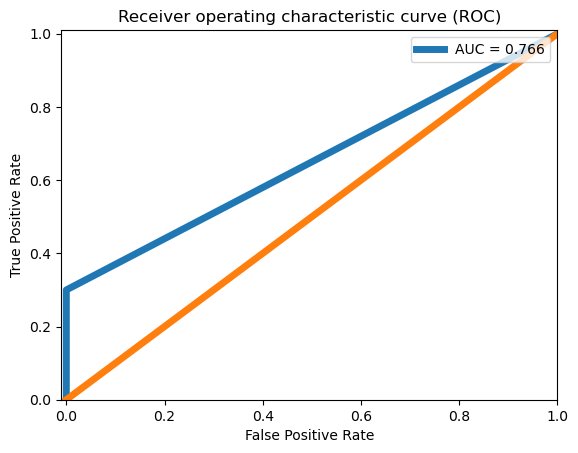

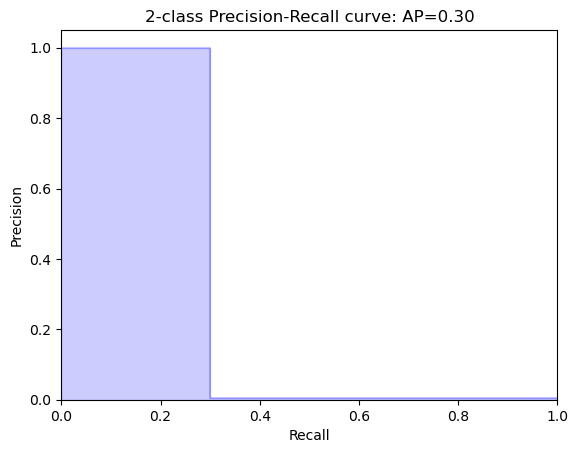

In [47]:
# Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

### Decision Tree Classifier

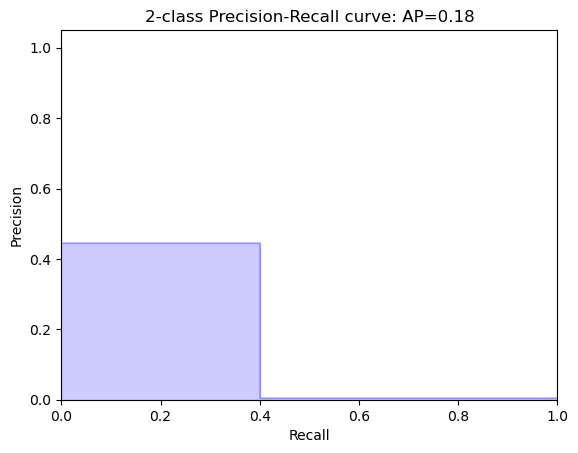

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.44      0.40      0.42        10

    accuracy                           1.00      2400
   macro avg       0.72      0.70      0.71      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2385    5]
 [   6    4]]


In [48]:
# Import the decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

In [49]:
# Import the pipeline module we need for this from imblearn
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

# Define resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.20      0.20      0.20        10

    accuracy                           0.99      2400
   macro avg       0.60      0.60      0.60      2400
weighted avg       0.99      0.99      0.99      2400

Confusion matrix:
 [[2382    8]
 [   8    2]]


## Random Forest Classifier

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_14720\462979217.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


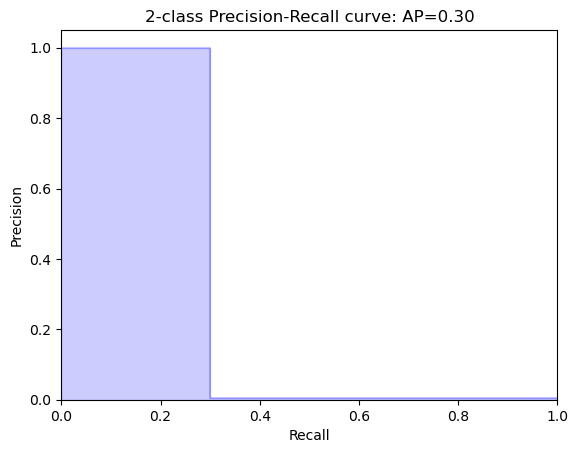

0.9970833333333333
AUC ROC score:  0.893347280334728
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


In [50]:
#Import the Random Forest Classifier model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

### Random Forest Classifier with SMOTE

In [51]:
# Import the pipeline module
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = RandomForestClassifier() 

# Define the pipeline and combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit the pipeline onto training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

0.9975
AUC ROC score:  0.8791841004184101
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.40      0.57        10

    accuracy                           1.00      2400
   macro avg       1.00      0.70      0.79      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   6    4]]


### KMeans Clustering

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset
features_train = normalize(features_train)
features_test = normalize(features_test)

### Build the model

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


labels_test_predicted = 1- labels_test_predicted

False


### Model Evaluation

In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[1135 1255]
 [   2    8]]
kmeans_precison_score: 0.006334125098970704
kmeans_recall_score: 0.8
kmeans_accuracy_score: 0.47625
kmeans_f1_score: 0.012568735271013355


### Autoencoders

#### Prepare training data and testing data
Drop the "Time" column and use the scikit’s StandardScaler on the Amount. The scaler removes the mean and scales
the values to unit variance. Autoencoder is gonna be a bit different from what we are used to. We will create this 
situation by training our model on the normal transactions, only.Reserve 30% of our data for testing

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Make another copy of df and drop the unimportant "Time" feature
data = df.drop(['Time'], axis=1) 

# Use scikit’s StandardScaler on the "Amount" feature
# Scaler removes the mean and scales the values to unit variance
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Create the training and testing sets
X1_train, X1_test = train_test_split(data, test_size=.3, random_state=0)
X1_train = X1_train[X1_train.Class == 0] # train the model on normal transactions
X1_train = X1_train.drop(['Class'], axis=1)

y1_test = X1_test['Class']
X1_test  = X1_test.drop(['Class'], axis=1) #drop the class column


#Transform to ndarray
X1_train = X1_train.values
X1_test = X1_test.values
X1_train.shape

(5593, 30)

In [56]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X1_train.shape[1] #num of columns, 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, 
                activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

### Train the Autoencoder Model

In [57]:
nb_epoch = 95
batch_size = 128
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

checkpointer = ModelCheckpoint(filepath='autoencoder_fraud.h5',
                               save_best_only=True,
                               verbose=0)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X1_train, X1_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, X1_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history
load_model('autoencoder_fraud.h5')

Epoch 1/95
44/44 [==============================] - 7s 37ms/step - loss: 0.9965 - accuracy: 0.0261 - val_loss: 1.1286 - val_accuracy: 0.0396
Epoch 2/95
44/44 [==============================] - 1s 29ms/step - loss: 0.9765 - accuracy: 0.0561 - val_loss: 1.1089 - val_accuracy: 0.0942
Epoch 3/95
44/44 [==============================] - 1s 19ms/step - loss: 0.9550 - accuracy: 0.1641 - val_loss: 1.0870 - val_accuracy: 0.2258
Epoch 4/95
44/44 [==============================] - 1s 20ms/step - loss: 0.9324 - accuracy: 0.2775 - val_loss: 1.0647 - val_accuracy: 0.3208
Epoch 5/95
44/44 [==============================] - 1s 33ms/step - loss: 0.9107 - accuracy: 0.3519 - val_loss: 1.0439 - val_accuracy: 0.3833
Epoch 6/95
44/44 [==============================] - 1s 14ms/step - loss: 0.8920 - accuracy: 0.4023 - val_loss: 1.0258 - val_accuracy: 0.4221
Epoch 7/95
44/44 [==============================] - 1s 14ms/step - loss: 0.8754 - accuracy: 0.4357 - val_loss: 1.0099 - val_accuracy: 0.4392
Epoch 8/95
44

Epoch 59/95
44/44 [==============================] - 0s 6ms/step - loss: 0.7229 - accuracy: 0.6136 - val_loss: 0.8691 - val_accuracy: 0.6187
Epoch 60/95
44/44 [==============================] - 0s 7ms/step - loss: 0.7220 - accuracy: 0.6168 - val_loss: 0.8681 - val_accuracy: 0.6112
Epoch 61/95
44/44 [==============================] - 0s 8ms/step - loss: 0.7213 - accuracy: 0.6152 - val_loss: 0.8678 - val_accuracy: 0.6154
Epoch 62/95
44/44 [==============================] - 0s 6ms/step - loss: 0.7204 - accuracy: 0.6163 - val_loss: 0.8668 - val_accuracy: 0.6137
Epoch 63/95
44/44 [==============================] - 0s 7ms/step - loss: 0.7195 - accuracy: 0.6172 - val_loss: 0.8659 - val_accuracy: 0.6142
Epoch 64/95
44/44 [==============================] - 0s 5ms/step - loss: 0.7189 - accuracy: 0.6161 - val_loss: 0.8652 - val_accuracy: 0.6175
Epoch 65/95
44/44 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.6186 - val_loss: 0.8653 - val_accuracy: 0.6150
Epoch 66/95
4

### Model Evaluation

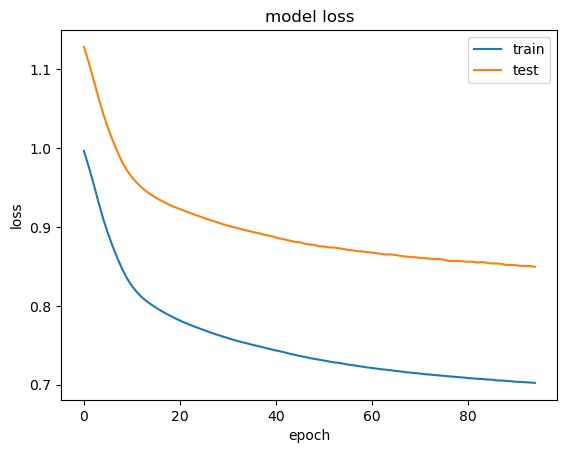

In [58]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Reconstruction Error

In [59]:
predictions = autoencoder.predict(X1_test)
mse = np.mean(np.power(X1_test - predictions, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse, 'true_class': y1_test})
df_error.describe()

75/75 [==============================] - 1s 6ms/step


,reconstruction_error,true_class
count,2400.000000,2400.000000
mean,0.849651,0.004167
std,4.252404,0.064429
min,0.059222,0.000000
25%,0.233586,0.000000
50%,0.408088,0.000000
75%,0.662536,0.000000
max,115.672256,1.000000


### ROC Curve

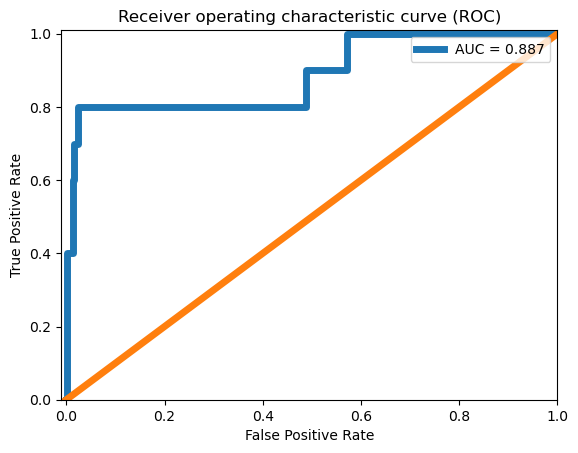

In [60]:
# Import modules
from sklearn.metrics import auc, roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_recall_fscore_support

false_positive_rate, true_positive_rate, thresholds = roc_curve(df_error.true_class, df_error.reconstruction_error)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Recall vs. Precision

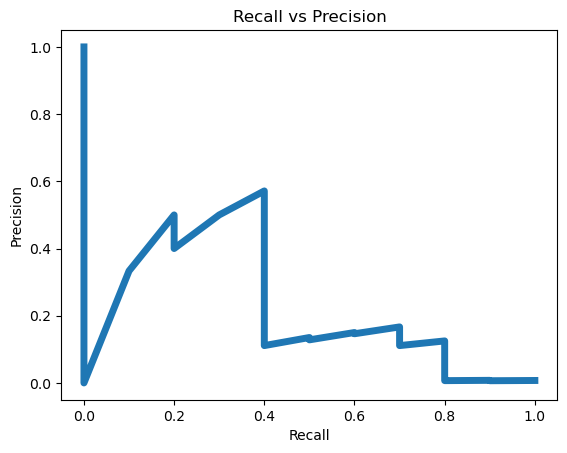

None


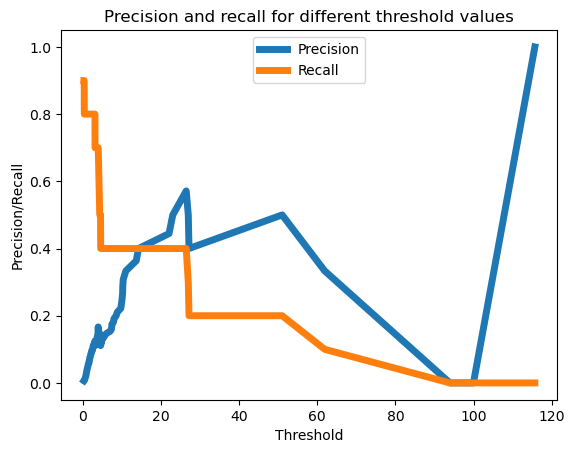

None


In [61]:
precision, recall, thresholds = precision_recall_curve(df_error.true_class, df_error.reconstruction_error)

# Plot recall precision tradeoff
plt.plot(recall, precision, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
print(plt.show())

# Plot precision and recall for different thresholds
plt.plot(thresholds, precision[1:], label="Precision",linewidth=5)
plt.plot(thresholds, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
print(plt.show())

### Prediction
In order to predict whether or not a new transaction is normal or fraudulent, we’ll calculate the reconstruction error
from the transaction data itself. If the error is larger than a predefined threshold, we’ll mark it as a fraud 
(since our model should have a low error on normal transactions).

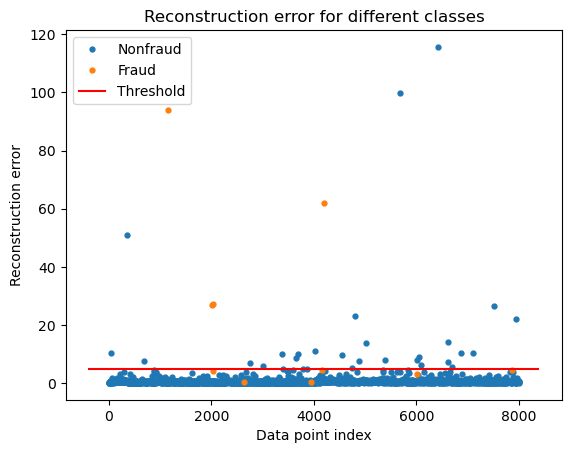

In [62]:
# Set a threshold
set_threshold = 5
groups = df_error.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, 
            group.reconstruction_error, 
            marker='o', 
            ms=3.5, 
            linestyle='',
            label= "Fraud" if name == 1 else "Nonfraud")
    
ax.hlines(set_threshold, 
          ax.get_xlim()[0], 
          ax.get_xlim()[1], 
          colors="r", 
          zorder=100, 
          label='Threshold')

ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

### Class Imbalance

### Input Split

In [72]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

### Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [74]:
x_scaler[-1]

array([ 1.64863172,  1.03130823, -0.39497507, -1.77249324, -0.26471943,
        1.67623142,  2.74905562, -0.42103267,  0.72190885,  1.03311654,
       -0.20100988, -0.58909259,  0.64153606, -0.47921994,  0.11645144,
       -0.98833919, -1.34449423,  0.17859086, -0.80646149,  0.37476733,
       -0.21247817,  0.13207602,  0.7210497 , -0.06959959,  1.26767405,
        0.93109716, -0.06715005,  0.05147967, -0.2076988 , -0.24856292,
       -0.06908451])

### Model Training

In [75]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [78]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.50      0.67         4

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.6666666666666666


### Class Imbalance

In [79]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1996
           1       0.01      0.50      0.03         4

    accuracy                           0.93      2000
   macro avg       0.51      0.72      0.50      2000
weighted avg       1.00      0.93      0.96      2000

F1 Score: 0.028571428571428574


C:\Users\DR SAGWE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      2000
   macro avg       1.00      0.62      0.70      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.4


In [83]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      0.50      0.67         4

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

F1 Score: 0.6666666666666666
